## NLP Final - Notebook #3 (NER & Entity Sentiment Analysis)
Author: Natalie Kim

Quarter: Winter 2025

In [5]:
!pwd

/home/jupyter/nlpfinal-nskim-bucket/jupyter-notebooks


In [6]:
import pandas as pd

df = pd.read_csv("../df_with_topics.csv")
df.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic
0,http://www.dataweek.co.za/21690r,2024-04-05,Flash for AI 28 March 2024 EBV Electrolink Dat...,flash for ai 28 march 2024 ebv electrolink dat...,Flash for AI 28 March 2024 EBV Electrolink Dat...,flash for ai 28 march 2024 ebv electrolink dat...,flash for ai 28 march 2024 ebv electrolink dat...,flash ai 28 ebv electrolink dataweek flash ai ...,-1
1,http://www.mysmartrend.com/news-briefs/technic...,2020-04-17,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,cr bard inc has returned 48.9% since smartrend...,Cr Bard Inc Has Returned 48.9% Since Recommend...,cr bard inc has returned 48.9% since recommend...,cr bard inc has returned 48.9% since smartrend...,cr bard inc returned 48.9 since smartrend reco...,35
2,https://abcnews.go.com/Entertainment/video/ai-...,2024-04-06,Video AI used for hiring and firing focus of b...,video ai used for hiring and firing focus of b...,Video AI used for hiring and firing focus of b...,video ai used for hiring and firing focus of b...,video ai used for hiring and firing focus of b...,video ai used hiring firing focus book journal...,-1
3,https://boingboing.net/2020/08/14/cory-doctoro...,2020-08-14,Cory Doctorow experiments with AI writing part...,cory doctorow experiments with ai writing part...,Cory Doctorow experiments with AI writing part...,cory doctorow experiments with ai writing part...,cory doctorow experiments with ai writing part...,cory doctorow experiments ai writing partner s...,-1
4,https://cio.economictimes.indiatimes.com/news/...,2023-05-31,Artificial Intelligence Top AI CEOs experts ra...,artificial intelligence top ai ceos experts ra...,"Artificial Intelligence: Top AI CEOs, experts ...",artificial intelligence top ai ce os experts r...,artificial intelligence top ai ceos experts ra...,artificial intelligence top ai ceos experts ra...,3


In [7]:
df.shape

(198891, 9)

In [8]:
# filtering for only relevant topics to find technologies
topics_to_remove = [-1, 1, 5, 17, 23, 24, 27, 42, 43, 45, 50, 57, 58, 59, 60, 62, 63, 66, 70, 73,
                    75, 77, 78, 81, 82, 83]

df_aitopics = df[~df['topic'].isin(topics_to_remove)].copy()
df_aitopics.shape

(82327, 9)

In [9]:
# combine text and titles
df_aitopics['textandtitle_clean'] = df_aitopics['title_clean'] + ' ' + df_aitopics['text_clean_ner']
df_aitopics.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic,textandtitle_clean
1,http://www.mysmartrend.com/news-briefs/technic...,2020-04-17,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,cr bard inc has returned 48.9% since smartrend...,Cr Bard Inc Has Returned 48.9% Since Recommend...,cr bard inc has returned 48.9% since recommend...,cr bard inc has returned 48.9% since smartrend...,cr bard inc returned 48.9 since smartrend reco...,35,Cr Bard Inc Has Returned 48.9% Since SmarTrend...
4,https://cio.economictimes.indiatimes.com/news/...,2023-05-31,Artificial Intelligence Top AI CEOs experts ra...,artificial intelligence top ai ceos experts ra...,"Artificial Intelligence: Top AI CEOs, experts ...",artificial intelligence top ai ce os experts r...,artificial intelligence top ai ceos experts ra...,artificial intelligence top ai ceos experts ra...,3,Artificial Intelligence Top AI CEOs experts ra...
11,https://citylife.capetown/uncategorized/machin...,2023-12-08,Machine Learning Revolutionizes Surface Predic...,machine learning revolutionizes surface predic...,Machine Learning Revolutionizes Surface Predic...,machine learning revolutionizes surface predic...,machine learning revolutionizes surface predic...,machine learning revolutionizes surface predic...,6,Machine Learning Revolutionizes Surface Predic...
12,https://cw33.com/technology/ap-technology/ap-n...,2023-05-26,Nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,Nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,nvidia stuns markets signals artificial intell...,9,Nvidia stuns markets and signals how artificia...
13,https://digitalmediawire.com/2024/10/08/meta-d...,2024-10-09,Meta Debuts New Generative AI Tools For VideoB...,meta debuts new generative ai tools for videob...,Meta Debuts New Generative AI Tools For Video-...,meta debuts new generative ai tools for video ...,meta debuts new generative ai tools for videob...,meta debuts new generative ai tools videobased...,13,Meta Debuts New Generative AI Tools For VideoB...


In [10]:
!pip install spacy
!pip install collections
!pip install pandarallel

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16676 sha256=6f990a6332b52a2776f22a721084c6bcdaf8db16d2195551a03a3e905885b14b
  Stored in directory: /home/jupyter/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [11]:
import spacy
from spacy import displacy

from collections import Counter
from pandarallel import pandarallel

In [12]:
spacy.__version__

'3.8.4'

In [13]:
import time
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print(f'Execution time to calculate for topic {k}: {t_hour}hour:{t_min}min:{t_sec}sec'.format(t_hour,t_min,t_sec))

In [14]:
import multiprocessing as mp
num_processors = mp.cpu_count()
print(f"Number of CPU processors: {num_processors}")

workers = num_processors-1
print(f'Using {workers} workers')

Number of CPU processors: 16
Using 15 workers


In [15]:
pandarallel.initialize(nb_workers=workers, progress_bar=True)

INFO: Pandarallel will run on 15 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Identifying New Technologies and AI Advancements

In [16]:
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 61.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [17]:
# Load SpaCy model
# nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load("en_core_web_md")
nlp = spacy.load("en_core_web_lg")
# nlp = spacy.load("en_core_web_trf")

### Baseline NER

In [20]:
# baseline ner
def extract_entities(text):
    if not isinstance(text, str):
        return {"ORG": [], "PRODUCT": []}
    try:
        doc = nlp(text)
        labels = {"ORG", "PRODUCT"}
        entities = {label: [] for label in labels}
        for ent in doc.ents:
            if ent.label_ in labels:
                entities[ent.label_].append(ent.text)
        return entities
    except Exception as e:
        print(f"Error processing text: {e}")
        return {"ORG": [], "PRODUCT": []}

In [21]:
%%time

# applying to dataframe
df_aitopics['entities'] = df_aitopics['textandtitle_clean'].parallel_apply(extract_entities)

CPU times: user 45.4 s, sys: 6.01 s, total: 51.4 s
Wall time: 19min 43s


In [22]:
# new df for top entities
labels = ['ORG', 'PRODUCT']
counters = {label: Counter() for label in labels}

for entities in df_aitopics['entities']:
    for label in labels:
        if label in entities:
            counters[label].update(entities[label])

top_entities = {label: [entity for entity, count in counters[label].most_common(40)] for label in labels}

max_len = max(len(lst) for lst in top_entities.values())

data = {}
for label in labels:
    padded = top_entities[label] + [""] * (max_len - len(top_entities[label]))
    data[label] = padded

df_top = pd.DataFrame(data)
df_top

,ORG,PRODUCT
0,AI,Windows 11
1,Microsoft,Indizes M
2,Google,Twitter Opens
3,GPT,Produkt
4,Apple,Excel
5,Nvidia,Windows
6,Amazon,AMD
7,IBM,CRM
8,Twitter,Fortune 500
9,Meta,Musk


### Topic/Industry Specific Technologies

In [25]:
# topic dictionary
topic_dict = {
    0: "Finance", 
    3: "Politics", 
    4: "Healthcare", 
    6: "Energy/Climate", 
    7: "Education", 
    8: "Image Generation", 
    12: "Legal", 
    14: "Retail", 
    15: "Jobs", 
    18: "Vehicles", 
    22: "Drug Discovery", 
    31: "Insurance", 
    38: "AI Performance", 
    40: "Clearview", 
    49: "Safety", 
    56: "Agriculture", 
    64: "Real Estate", 
    69: "Travel/Hospitality", 
    76: "Brain Research", 
    85: "Business", 
    86: "Medical"
}

In [26]:
top_entities_by_topic = {}

for topic, group in df_aitopics.groupby('topic'):
    org_counter = Counter()
    prod_counter = Counter()
    for ent in group['entities']:
        if isinstance(ent, dict):
            if "ORG" in ent:
                org_counter.update(ent["ORG"])
            if "PRODUCT" in ent:
                prod_counter.update(ent["PRODUCT"])
    # Extract the top 10 for each category
    top_orgs = [entity for entity, count in org_counter.most_common(10)]
    top_products = [entity for entity, count in prod_counter.most_common(10)]
    top_entities_by_topic[topic] = {"ORG": top_orgs, "PRODUCT": top_products}

In [27]:
from IPython.display import display, Markdown

In [28]:
# displaying top 10 entities for each topic
for topic, topic_name in topic_dict.items():
    if topic in top_entities_by_topic:
        # Retrieve lists for ORG and PRODUCT
        org_list = top_entities_by_topic[topic].get("ORG", [])
        prod_list = top_entities_by_topic[topic].get("PRODUCT", [])
        # Ensure both lists have 10 items (pad with empty strings if necessary)
        max_len = 10
        org_list += [""] * (max_len - len(org_list))
        prod_list += [""] * (max_len - len(prod_list))
        df_topic = pd.DataFrame({
            "ORG": org_list,
            "PRODUCT": prod_list
        }, index=[f"Rank {i+1}" for i in range(max_len)])
        
        # Display a header with the human-readable topic name and the topic number.
        display(Markdown(f"### {topic_name} (Topic {topic})"))
        display(df_topic)

### Finance (Topic 0)

,ORG,PRODUCT
Rank 1,AI,CRM
Rank 2,Microsoft,the S P 500
Rank 3,Google,S P 500
Rank 4,Nvidia,Acme Themes
Rank 5,IBM,SaaS
Rank 6,Amazon,Fortune 500
Rank 7,Apple,ZAGGLE
Rank 8,GPT,Coinbase
Rank 9,Artificial Intelligence AI,AMD
Rank 10,Intel,Javascript


### Politics (Topic 3)

,ORG,PRODUCT
Rank 1,AI,Twitter Opens
Rank 2,Google,Sunak
Rank 3,Microsoft,Enigma
Rank 4,AP,twitter
Rank 5,Trump,Meteor
Rank 6,Congress,Log InCreate
Rank 7,White House,Twitter
Rank 8,Meta,DeSantis
Rank 9,EU,Air Force One
Rank 10,GPT,Musk


### Healthcare (Topic 4)

,ORG,PRODUCT
Rank 1,AI,ECG
Rank 2,Healthcare,Acme Themes
Rank 3,Gray Media Group,AV
Rank 4,Microsoft,Fortune 500
Rank 5,FDA,510k
Rank 6,Medtronic,Coronavirus COVID-19
Rank 7,Google,GLM
Rank 8,PRNewswire,Twitter Opens
Rank 9,"Gray Television, Inc.",Explorer
Rank 10,Artificial Intelligence AI,Full Forecast Log


### Energy/Climate (Topic 6)

,ORG,PRODUCT
Rank 1,AI,Mobius
Rank 2,Microsoft,Constellation
Rank 3,Google,HUAWEI CLOUD
Rank 4,IBM,Exiger
Rank 5,NASA,Meteor
Rank 6,Gray Media Group,CO 2
Rank 7,Schneider Electric,Explorer
Rank 8,"Gray Television, Inc.",Saturn
Rank 9,PRNewswire,Twitter Opens
Rank 10,Amazon,Humpbacks


### Education (Topic 7)

,ORG,PRODUCT
Rank 1,AI,Pearson
Rank 2,GPT,K-12
Rank 3,Google,Turnitin
Rank 4,Gray Media Group,GPT Zero
Rank 5,AP,Twitter Opens
Rank 6,"Gray Television, Inc.",Gpt s
Rank 7,PRNewswire,twitter
Rank 8,Microsoft,Full Forecast Log
Rank 9,Quizlet,Meteor
Rank 10,NPR,PRNewsfoto QuizletPRNewswireQ-Chat


### Image Generation (Topic 8)

,ORG,PRODUCT
Rank 1,AI,AI Overviews
Rank 2,Google,Stable Diffusion
Rank 3,Adobe,Windows
Rank 4,YouTube,Windows 11
Rank 5,Microsoft,Canon
Rank 6,Artprice,Magic Editor
Rank 7,Apple,Stable Diffusion XL
Rank 8,Shutterstock,B 2
Rank 9,Meta,Veo 2
Rank 10,Twitter,Twitter Opens


### Legal (Topic 12)

,ORG,PRODUCT
Rank 1,AI,Westlaw
Rank 2,Microsoft,the Am Law 200
Rank 3,Times,Fortune 100
Rank 4,GPT,Levidow
Rank 5,FTC,twitter
Rank 6,Google,discovery
Rank 7,The New York Times,Am Law 100
Rank 8,AP,Windows 11
Rank 9,Meta,Twitter Opens
Rank 10,NPR,Stable Diffusion


### Retail (Topic 14)

,ORG,PRODUCT
Rank 1,AI,Shopify
Rank 2,Gray Media Group,True Fit
Rank 3,Walmart,Voicify
Rank 4,Google,Tori
Rank 5,PRNewswire,True Fit's
Rank 6,"Gray Television, Inc.",Explorer
Rank 7,Amazon,SaaS
Rank 8,McDonald's,Fit
Rank 9,Google Cloud,Magic
Rank 10,Shopify,Twitter Opens


### Jobs (Topic 15)

,ORG,PRODUCT
Rank 1,AI,Pearson
Rank 2,EEOC,Twitter Opens
Rank 3,Microsoft,Title VII
Rank 4,Generative AI,Fortune 500
Rank 5,Gray Media Group,SaaS
Rank 6,GPT,S P 500
Rank 7,Google,the Fortune Most Admired Companies
Rank 8,IBM,CRM
Rank 9,PRNewswire,Meteor
Rank 10,"Gray Television, Inc.",Fortune 2000


### Vehicles (Topic 18)

,ORG,PRODUCT
Rank 1,AI,Light Trucks
Rank 2,BMW,AVs
Rank 3,GM,AV
Rank 4,Google,Fortune 500
Rank 5,EV,Fleet Complete and Pitstop
Rank 6,Artificial Intelligence AI,Green Light
Rank 7,John Larkin Engineering Design,Alerts
Rank 8,Volkswagen,F 1
Rank 9,Tesla,Fleet Complete
Rank 10,Toyota,Peugeot


### Drug Discovery (Topic 22)

,ORG,PRODUCT
Rank 1,AI,discovery
Rank 2,Artificial Intelligence AI,Chroma
Rank 3,Gray Media Group,AAV
Rank 4,Drug Discovery,Signet
Rank 5,Google,Discovery
Rank 6,PRNewswire,Insitro
Rank 7,Pfizer,Africa MEA
Rank 8,"Gray Television, Inc.",Explorer
Rank 9,Microsoft,Full Forecast Log
Rank 10,Merck,Atomwise


### Insurance (Topic 31)

,ORG,PRODUCT
Rank 1,AI,Cover Whale
Rank 2,Google,Tractable
Rank 3,CA ACCESSWIRE,Cover Whale's
Rank 4,Internet Marketing Company,Cyber
Rank 5,Gray Media Group,Explorer
Rank 6,FatBrain,SaaS
Rank 7,Microsoft,Model Bulletin
Rank 8,GPT,Charlee.ai
Rank 9,PRNewswire,ExBulletin Chat
Rank 10,AIGC,Full Forecast Log


### AI Performance (Topic 38)

,ORG,PRODUCT
Rank 1,AI,Ethernet
Rank 2,IBM,APU
Rank 3,IP,AMD
Rank 4,Synopsys,AV
Rank 5,GPU,Edge Impulse
Rank 6,Intel,Explorer
Rank 7,IoT,Cadence
Rank 8,SoC,Edge Learning -code
Rank 9,CPU,Xilinx
Rank 10,Gray Media Group,Windows 11


### Clearview (Topic 40)

,ORG,PRODUCT
Rank 1,AI,Log InCreate
Rank 2,Clearview AI,Draft One
Rank 3,Clearview,twitter
Rank 4,Facebook,Ocado
Rank 5,Google,SaaS
Rank 6,Amazon,The Online News Act
Rank 7,EU,twitter email
Rank 8,Microsoft,Truleo
Rank 9,AIDA,Visitez Radio-Canada.canow
Rank 10,Twitter,Messenger


### Safety (Topic 49)

,ORG,PRODUCT
Rank 1,Google Scholar- Inter-Library Document,F 1
Rank 2,DOI,AVs
Rank 3,Elsevier Publishing,LR
Rank 4,TBI,Light GBM
Rank 5,ML,AV
Rank 6,MDPI,Twitter Opens
Rank 7,AI,XGBoost Direct
Rank 8,SVM,RF
Rank 9,Multidisciplinary Digital Publishing Institute,GBT
Rank 10,Machine Learning,the Light GBM


### Agriculture (Topic 56)

,ORG,PRODUCT
Rank 1,AI,Nitrogen
Rank 2,Artificial Intelligence AI,SaaS
Rank 3,OneSoil,Helios
Rank 4,Microsoft,UAVs
Rank 5,IBM,SAP Agribotix
Rank 6,SK,Weather Alerts Alerts
Rank 7,Deere,NewsBreak
Rank 8,Company,Fortune 500
Rank 9,Agriculture Market,Full Forecast Log
Rank 10,IoT,Full Forecast Home Daily Games Card Games Word...


### Real Estate (Topic 64)

,ORG,PRODUCT
Rank 1,AI,Twitter Opens
Rank 2,Zillow,Cole
Rank 3,MORGAN,Redfin
Rank 4,Sunny,CRM
Rank 5,Gray Media Group,MORGAN.MORGAN
Rank 6,Zenerate,CoStar
Rank 7,GPT,Shopify
Rank 8,Opens,Vulcan
Rank 9,MLS,Explorer
Rank 10,PRNewswire,iPhone 12


### Travel/Hospitality (Topic 69)

,ORG,PRODUCT
Rank 1,AI,the AXS App
Rank 2,SAS,F
Rank 3,Priceline,AirPods Max First
Rank 4,Gray Media Group,Fourth iQ
Rank 5,Booking.com,OneAir Elite Plan
Rank 6,SAS Explore,Guest Messaging
Rank 7,Trip.com,Drink
Rank 8,Google,245-8880
Rank 9,PRNewswire,Observe
Rank 10,Gen AI,806-331-9839 Terms of 's


### Brain Research (Topic 76)

,ORG,PRODUCT
Rank 1,AI,Meteor
Rank 2,the University of Texas,Gunman
Rank 3,GPT,Classic 88.9
Rank 4,NPR,Twitter
Rank 5,CNN,Share
Rank 6,ALS,Clubhouse Explorers WVIA's
Rank 7,Synchron,Saturn
Rank 8,Neuroscience,Alerts
Rank 9,Facebook,Air FOX 4
Rank 10,"Gray Media Group, Inc. Station",Voyager 2


### Business (Topic 85)

,ORG,PRODUCT
Rank 1,Technology AI Business,PBX
Rank 2,AI,Indizes M
Rank 3,Generative AI,Produkt
Rank 4,North America,Teslas
Rank 5,Facebook,Waymo
Rank 6,Google,200mn
Rank 7,Apple,Twitter
Rank 8,Amazon,
Rank 9,SOC,
Rank 10,Webroot,


### Medical (Topic 86)

,ORG,PRODUCT
Rank 1,GPT,PubMed GPT
Rank 2,AI,Motrin
Rank 3,Google,Kudi
Rank 4,USMLE,Sections Shows
Rank 5,"Gray Television, Inc.",Study Chat GPT
Rank 6,UMSOM,playstation pok mon
Rank 7,The School of Medicine,iPad
Rank 8,Long Island University,Mauna Loa Eruption Viewing Area
Rank 9,LLM,PDM Ps
Rank 10,Gray Media Group,agoAutoblog BMW


### Plot Timeline of Introduction of Technologies
**Products**
- CRM
- Chat GPT/GPT
- Clearview
- Guardforce
- Shield AI
- verde
- oneplus
- virtus
- nvidia
- stable diffusion
- charlee
- helios

In [29]:
df_aitopics['date'] = pd.to_datetime(df_aitopics['date'])

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [31]:
tech_list = ["crm", 'gpt', "ethereum", "clearview", "shield ai", "verde", "nvidia", "helios", "charlee"]

In [32]:
def contains_tech(entities, tech):
    # If entities is not a dict, return False
    if not isinstance(entities, dict):
        return False
    # Check both ORG and PRODUCT lists for the keyword
    for label in ['ORG', 'PRODUCT']:
        for ent in entities.get(label, []):
            if tech in ent.lower():
                return True
    return False

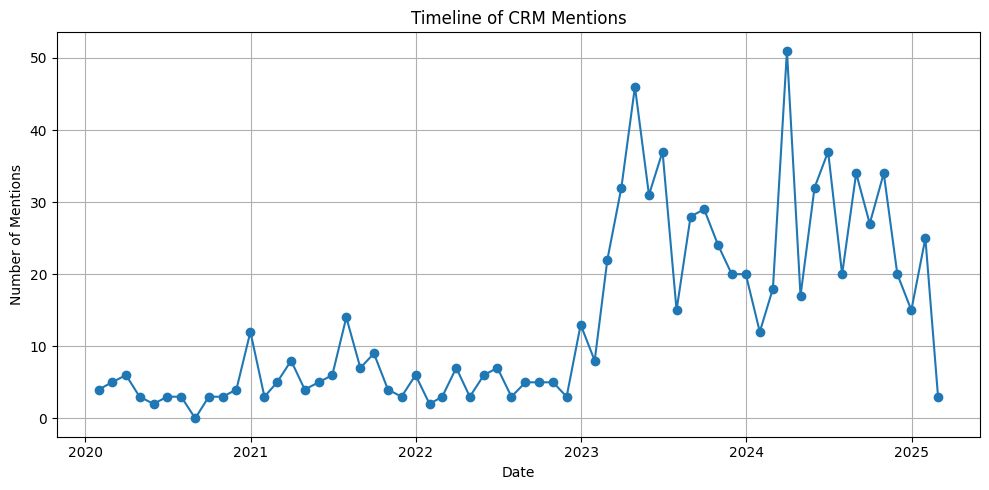

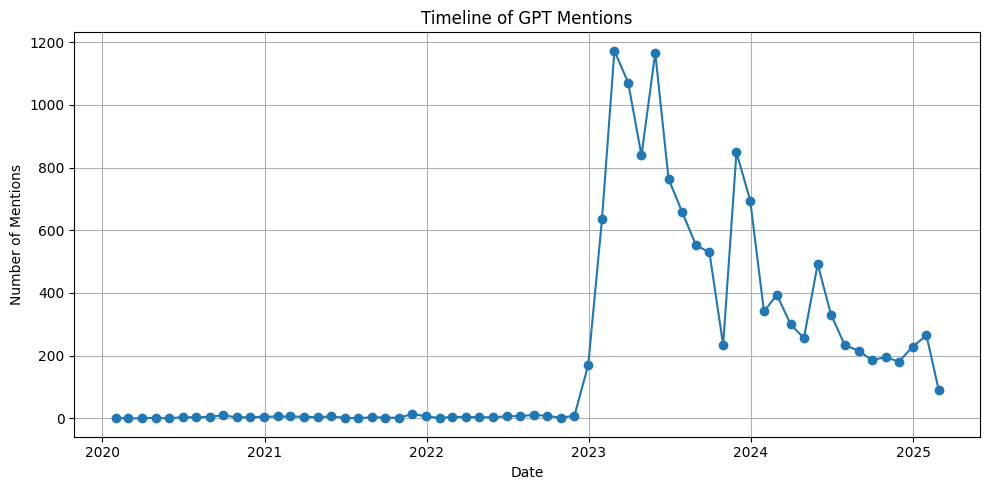

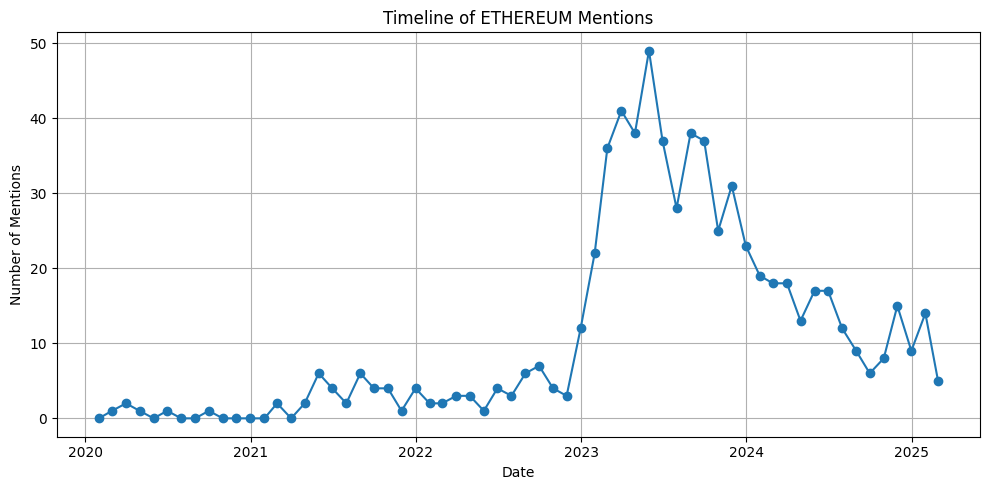

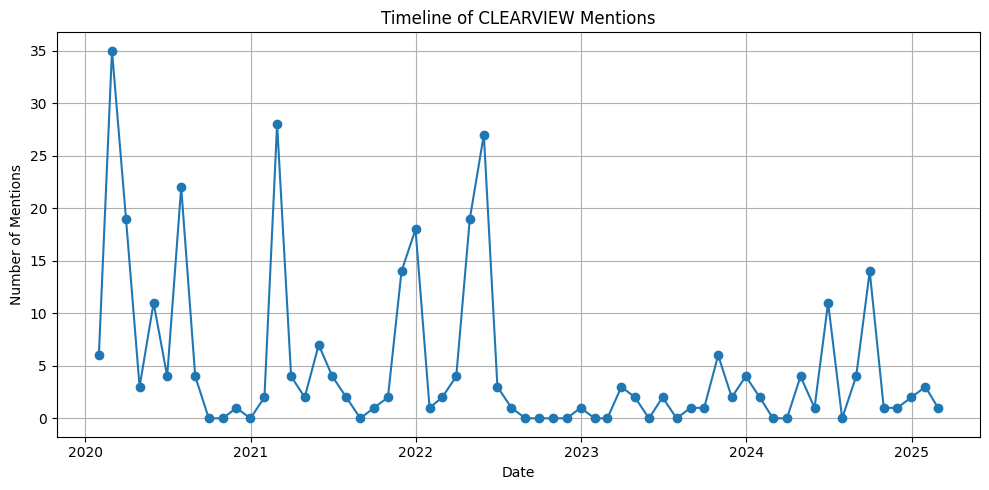

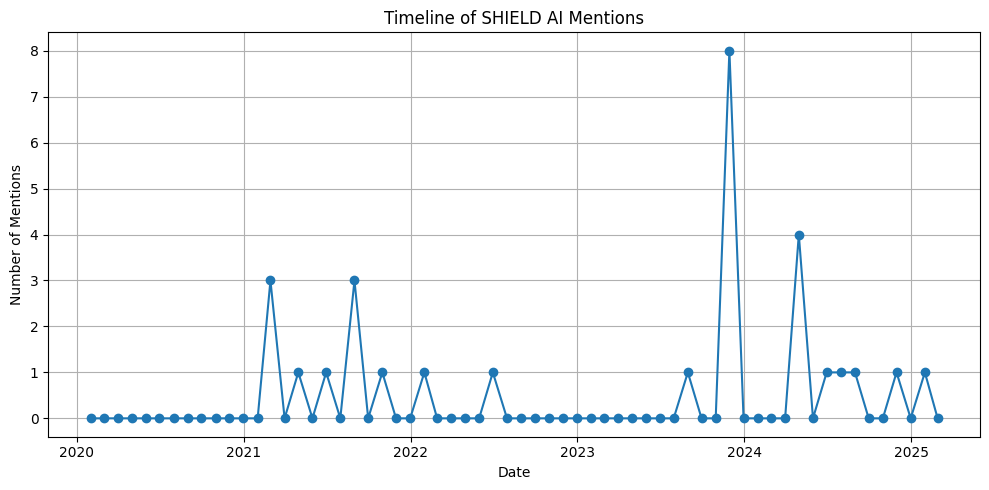

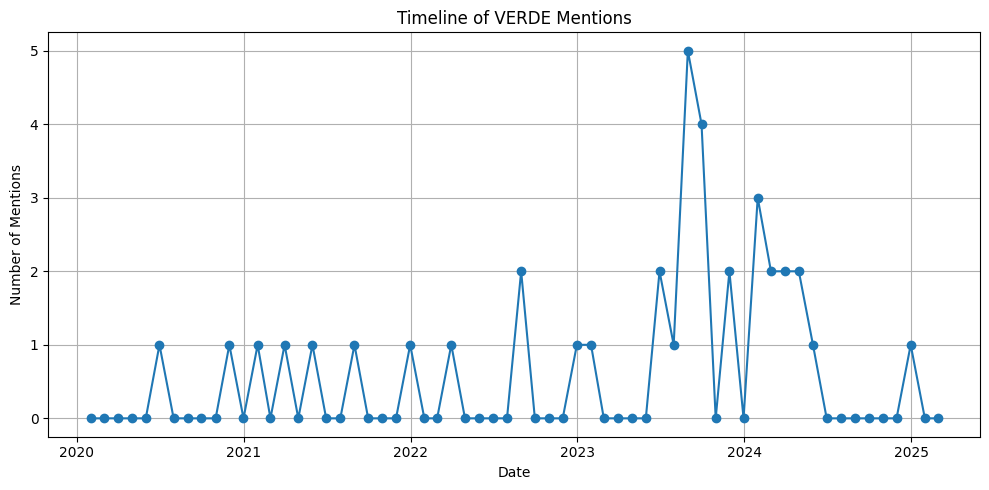

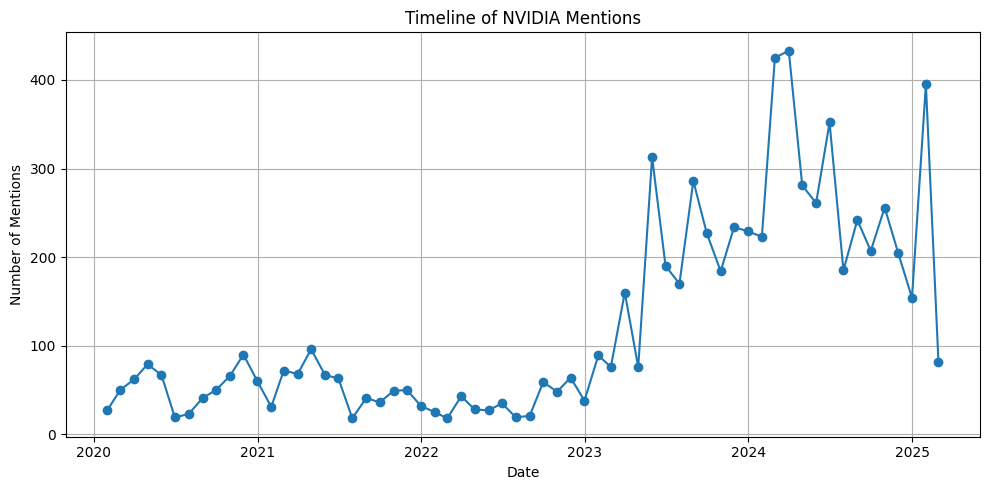

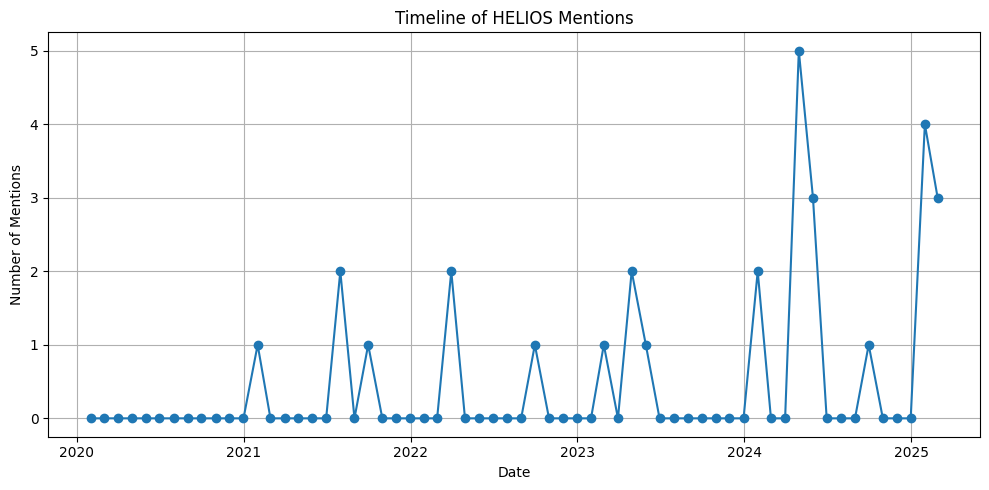

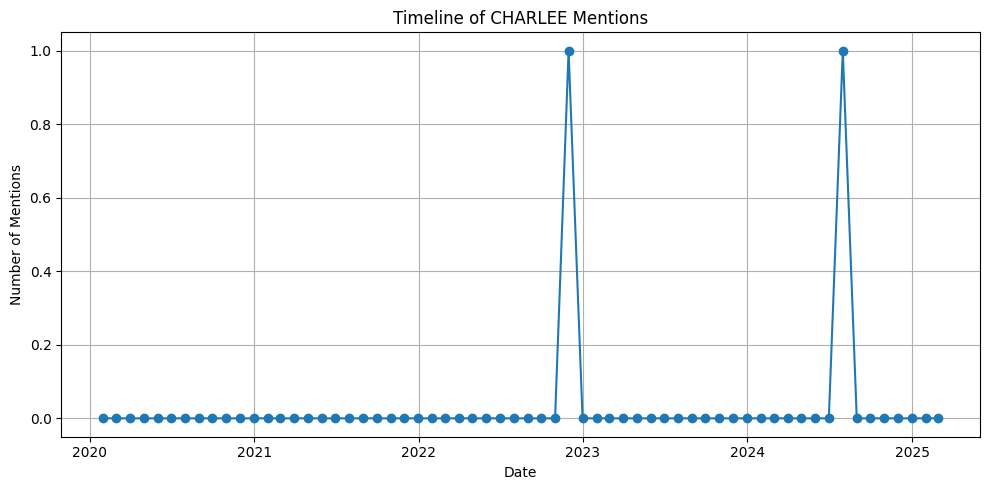

In [33]:
for tech in tech_list:
    df_aitopics[f"mentions_{tech}"] = df_aitopics["entities"].apply(lambda ents: 1 if contains_tech(ents, tech) else 0)

    # Group by month (using month-end 'ME') and sum the mentions for that technology
    tech_timeline = df_aitopics.groupby(pd.Grouper(key='date', freq='ME'))[f"mentions_{tech}"].sum()

    # Plot the timeline for that technology
    plt.figure(figsize=(10, 5))
    plt.plot(tech_timeline.index, tech_timeline.values, marker='o', linestyle='-')
    plt.xlabel("Date")
    plt.ylabel("Number of Mentions")
    plt.title(f"Timeline of {tech.upper()} Mentions")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [36]:
df_aitopics.to_csv("/home/jupyter/nlpfinal-nskim-bucket/df_emerging_tech.csv", index=False)

### Accelerating Capabilities of Key Entities

In [37]:
topics_to_remove = [-1, 1, 5, 17, 23, 24, 27, 42, 43, 45, 50, 57, 58, 59, 60, 62, 63, 66, 70, 73,
                    75, 77, 78, 81, 82, 83]

df_org_entities = df[~df['topic'].isin(topics_to_remove)].copy()
df_org_entities.shape

(82327, 9)

In [39]:
df_org_entities['textandtitle_clean'] = df_org_entities['title_clean'] + ' ' + df_org_entities['text_clean_ner']
df_org_entities.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic,textandtitle_clean
1,http://www.mysmartrend.com/news-briefs/technic...,2020-04-17,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,cr bard inc has returned 48.9% since smartrend...,Cr Bard Inc Has Returned 48.9% Since Recommend...,cr bard inc has returned 48.9% since recommend...,cr bard inc has returned 48.9% since smartrend...,cr bard inc returned 48.9 since smartrend reco...,35,Cr Bard Inc Has Returned 48.9% Since SmarTrend...
4,https://cio.economictimes.indiatimes.com/news/...,2023-05-31,Artificial Intelligence Top AI CEOs experts ra...,artificial intelligence top ai ceos experts ra...,"Artificial Intelligence: Top AI CEOs, experts ...",artificial intelligence top ai ce os experts r...,artificial intelligence top ai ceos experts ra...,artificial intelligence top ai ceos experts ra...,3,Artificial Intelligence Top AI CEOs experts ra...
11,https://citylife.capetown/uncategorized/machin...,2023-12-08,Machine Learning Revolutionizes Surface Predic...,machine learning revolutionizes surface predic...,Machine Learning Revolutionizes Surface Predic...,machine learning revolutionizes surface predic...,machine learning revolutionizes surface predic...,machine learning revolutionizes surface predic...,6,Machine Learning Revolutionizes Surface Predic...
12,https://cw33.com/technology/ap-technology/ap-n...,2023-05-26,Nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,Nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,nvidia stuns markets signals artificial intell...,9,Nvidia stuns markets and signals how artificia...
13,https://digitalmediawire.com/2024/10/08/meta-d...,2024-10-09,Meta Debuts New Generative AI Tools For VideoB...,meta debuts new generative ai tools for videob...,Meta Debuts New Generative AI Tools For Video-...,meta debuts new generative ai tools for video ...,meta debuts new generative ai tools for videob...,meta debuts new generative ai tools videobased...,13,Meta Debuts New Generative AI Tools For VideoB...


In [41]:
# apply all  ner
entity_labels = ['PERSON', 'NORP', 'FAC', 'ORG', 'GPE', 'LOC', 'PRODUCT', 'EVENT', 'WORK_OF_ART', 'LAW']

def extract_all_entities(text):
    if not isinstance(text, str):
        return {label: [] for label in entity_labels}
    try:
        doc = nlp(text)
        # Initialize a dictionary with all desired entity labels.
        entities = {label: [] for label in entity_labels}
        # Iterate over detected entities and add those with matching labels.
        for ent in doc.ents:
            if ent.label_ in entity_labels:
                entities[ent.label_].append(ent.text)
        # Remove duplicates by converting each list to a set then back to a list.
        for label in entities:
            entities[label] = list(set(entities[label]))
        return entities
    except Exception as e:
        print(f"Error processing text: {e}")
        return {label: [] for label in entity_labels}

In [42]:
%%time

df_org_entities['ner_entities'] = df_org_entities['textandtitle_clean'].parallel_apply(extract_all_entities)

CPU times: user 49.4 s, sys: 8.75 s, total: 58.2 s
Wall time: 22min 23s


In [43]:
df_org_entities.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic,textandtitle_clean,ner_entities
1,http://www.mysmartrend.com/news-briefs/technic...,2020-04-17,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,cr bard inc has returned 48.9% since smartrend...,Cr Bard Inc Has Returned 48.9% Since Recommend...,cr bard inc has returned 48.9% since recommend...,cr bard inc has returned 48.9% since smartrend...,cr bard inc returned 48.9 since smartrend reco...,35,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,"{'PERSON': ['C. R. Bard', 'Shiri Gupta'], 'NOR..."
4,https://cio.economictimes.indiatimes.com/news/...,2023-05-31,Artificial Intelligence Top AI CEOs experts ra...,artificial intelligence top ai ceos experts ra...,"Artificial Intelligence: Top AI CEOs, experts ...",artificial intelligence top ai ce os experts r...,artificial intelligence top ai ceos experts ra...,artificial intelligence top ai ceos experts ra...,3,Artificial Intelligence Top AI CEOs experts ra...,"{'PERSON': ['Thierry Breton', 'Geoffrey Hinton..."
11,https://citylife.capetown/uncategorized/machin...,2023-12-08,Machine Learning Revolutionizes Surface Predic...,machine learning revolutionizes surface predic...,Machine Learning Revolutionizes Surface Predic...,machine learning revolutionizes surface predic...,machine learning revolutionizes surface predic...,machine learning revolutionizes surface predic...,6,Machine Learning Revolutionizes Surface Predic...,"{'PERSON': [], 'NORP': [], 'FAC': [], 'ORG': [..."
12,https://cw33.com/technology/ap-technology/ap-n...,2023-05-26,Nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,Nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,nvidia stuns markets and signals how artificia...,nvidia stuns markets signals artificial intell...,9,Nvidia stuns markets and signals how artificia...,"{'PERSON': ['Christopher Rolland', 'Jensen Hua..."
13,https://digitalmediawire.com/2024/10/08/meta-d...,2024-10-09,Meta Debuts New Generative AI Tools For VideoB...,meta debuts new generative ai tools for videob...,Meta Debuts New Generative AI Tools For Video-...,meta debuts new generative ai tools for video ...,meta debuts new generative ai tools for videob...,meta debuts new generative ai tools videobased...,13,Meta Debuts New Generative AI Tools For VideoB...,"{'PERSON': ['Olobaniyi', 'Intune Follow'], 'NO..."


In [44]:
df_org_entities.to_csv("/home/jupyter/nlpfinal-nskim-bucket/df_all_ner.csv", index=False)

In [47]:
# new df to identify companies, academic institutions, gov't bodies
labels = ['FAC', 'ORG']
counters = {label: Counter() for label in labels}

for entities in df_org_entities['ner_entities']:
    for label in labels:
        if label in entities:
            counters[label].update(entities[label])

top_groups = {label: [entity for entity, count in counters[label].most_common(50)] for label in labels}

max_len = max(len(lst) for lst in top_groups.values())

data2 = {}
for label in labels:
    padded = top_groups[label] + [""] * (max_len - len(top_groups[label]))
    data2[label] = padded

df_top_groups = pd.DataFrame(data2)
df_top_groups

,FAC,ORG
0,Chat GPT,AI
1,Org View,Microsoft
2,Chat GPT's,Google
3,EURUSD,GPT
4,the White House,Apple
5,Bletchley Park,Twitter
6,Chat GPT Plus,Amazon
7,Vatican,Facebook
8,Program Transportation Small Small Franchises,"Gray Television, Inc."
9,Broadway,PRNewswire
